## <a id=99>Описание датасета</a> 
[К датасету](#1)


___
## <center><a id=0 style='color:red'>Импорт библиотек</a>

In [1]:
from ds_nms import funcs, data_proc, stat_tests, utils_io

In [2]:
import pandas as pd
from scipy.stats import kstest, kruskal
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Any, Dict
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold, cross_validate, StratifiedGroupKFold, StratifiedKFold
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, Normalizer, MinMaxScaler, PowerTransformer, PolynomialFeatures, OrdinalEncoder, TargetEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, IsolationForest, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [3]:
np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

___
## <center><a id=1 style='color:red'>Импорт датасета</a>
 [К описанию](#99)

In [4]:
data_initial = pd.read_excel('data/Data(2).xlsx')

display(data_initial.head(3))
data_initial.shape

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
0,1,Генерала Тюленева,3700,961,288,33349.734790,0.000000,9024.025364,0.000000,16794.209437,0.0,2601.096069,0.000000,2
1,2,Университет Дружбы Народов,9470,500,1700,44319.392083,0.000000,22920.388808,0.000000,0.000000,0.0,524163.822269,0.000000,1
2,7,Коптево,19151,2287,1849,61779.220594,13030.090191,24263.766188,4200.174302,6424.672688,0.0,41312.099110,4825.454481,2


(132, 14)

___
### Дубликаты

In [5]:
df_dupl_sum_validations = data_proc.get_duplicated_df(data_initial, 'sum validations')
df_dupl_sum_validations

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
17,374,Коньково,30699,4707,2162,41631.358323,0.000000,10706.816009,0.000000,80080.543594,0.000000,224794.313980,0.000000,0
25,538,Бибирево,30699,5462,1651,109239.591718,12460.115469,30354.062124,4091.938161,168971.130622,10901.809243,55449.152038,2686.667267,0


In [6]:
df_dupl_y2 = data_proc.get_duplicated_df(data_initial, 'morning rush hour')

display(df_dupl_y2)
df_dupl_y2.shape

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
0,1,Генерала Тюленева,3700,961,288,33349.734790,0.000000,9024.025364,0.000000,16794.209437,0.000000,2601.096069,0.000000,2
97,2962,Волгоградский проспект,24561,961,4044,13840.133755,4062.678852,15853.485611,5132.172705,102742.973071,17633.439959,3034.372429,2693.415393,1
46,1293,Каширская,37108,2952,4337,20220.482623,1045.269807,20659.341923,1598.164644,112962.364396,76998.669299,406127.732639,0.000000,2
49,1417,Измайловская,21563,2952,1250,30982.267286,0.000000,10492.425117,0.000000,22932.881010,0.000000,13899.833561,0.000000,0


(4, 14)

In [7]:
df_dupl_y3 = data_proc.get_duplicated_df(data_initial, 'evening rush hour')

display(df_dupl_y3)
df_dupl_y3.shape

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
50,1470,Давыдково,15701,1468,2803,51201.489539,16051.606314,33554.506138,7862.430102,18630.586770,2269.596039,1995.275881,438.491763,2
81,2697,Нахимовский проспект,22604,2465,2803,31968.092514,810.384902,14015.134111,280.143386,11745.498201,0.000000,22441.700702,0.000000,2


(2, 14)

Text(0.5, 1.0, 'Станции с одинаковым утренним пассажиропотоком')

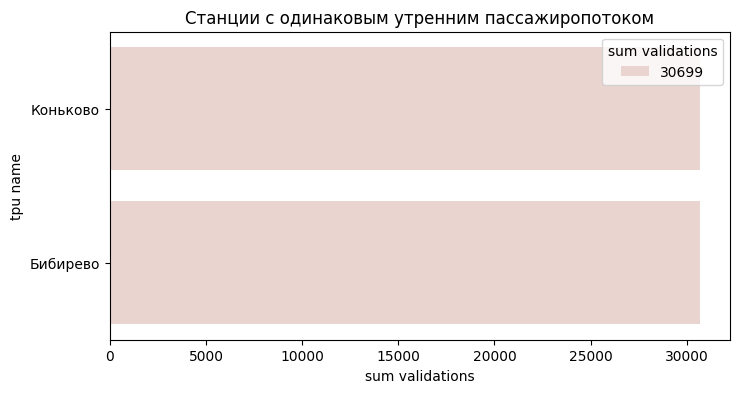

In [8]:
fig  = plt.figure( figsize=(8,4))

sns.barplot(data=df_dupl_sum_validations, x='sum validations', y='tpu name', hue='sum validations')
plt.title("Станции с одинаковым утренним пассажиропотоком")

Text(0.5, 1.0, 'Станции с одинаковым утренним пассажиропотоком')

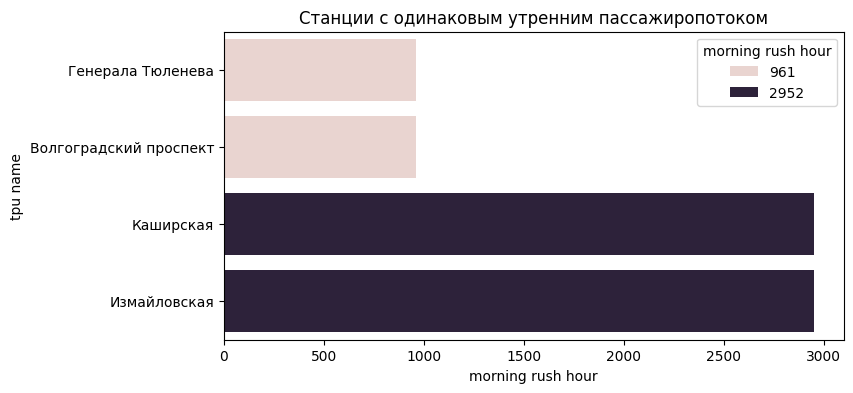

In [9]:
fig  = plt.figure( figsize=(8,4))

sns.barplot(data=df_dupl_y2, x='morning rush hour', y='tpu name', hue='morning rush hour')
plt.title("Станции с одинаковым утренним пассажиропотоком")


Text(0.5, 1.0, 'Станции с одинаковым вечерним пассажиропотоком')

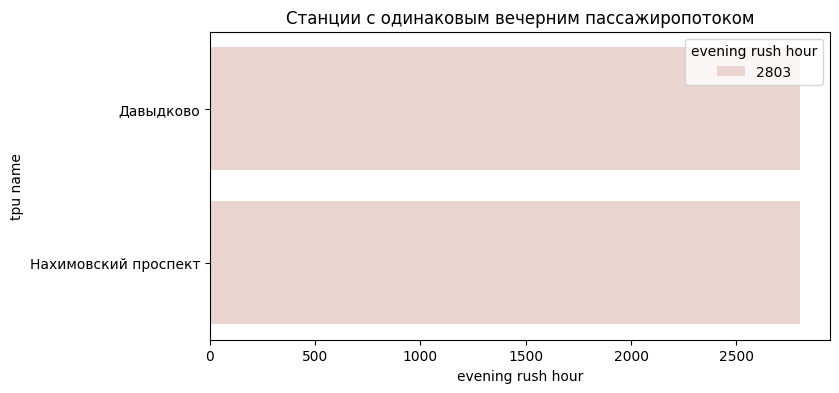

In [10]:
fig  = plt.figure( figsize=(8,4))

sns.barplot(data=df_dupl_y3, x='evening rush hour', y='tpu name', hue='evening rush hour')
plt.title("Станции с одинаковым вечерним пассажиропотоком")

- duplicates

In [11]:
dupl = data_initial.duplicated()
data_initial[dupl].values

array([], shape=(0, 14), dtype=object)

- NaN

In [12]:
(data_initial.isna()).any()

tpu id                       False
tpu name                     False
sum validations              False
morning rush hour            False
evening rush hour            False
gsm population               False
gsm zone mcd population      False
gsm workplaces               False
gsm zone mcd workplaces      False
area shopping malls          False
zone area shopping malls     False
area hospital                False
zone area hospital           False
cluster                      False
dtype: bool

In [13]:
# data_initial = data_initial.fillna(0)

# data_initial.to_pickle('data/data_initial.pkl')

In [14]:
data_initial.head(2)

,tpu id,tpu name,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,cluster
0,1,Генерала Тюленева,3700,961,288,33349.734790,0.0,9024.025364,0.0,16794.209437,0.0,2601.096069,0.0,2
1,2,Университет Дружбы Народов,9470,500,1700,44319.392083,0.0,22920.388808,0.0,0.000000,0.0,524163.822269,0.0,1


___
## CLuster 0

In [15]:
data_initial_c1 = data_initial[data_initial['cluster'] == 0]
data_initial_c1.to_pickle('data/data_initial.pkl')
data_initial_c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 3 to 125
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tpu id                     42 non-null     int64  
 1   tpu name                   42 non-null     object 
 2   sum validations            42 non-null     int64  
 3   morning rush hour          42 non-null     int64  
 4   evening rush hour          42 non-null     int64  
 5   gsm population             42 non-null     float64
 6   gsm zone mcd population    42 non-null     float64
 7   gsm workplaces             42 non-null     float64
 8   gsm zone mcd workplaces    42 non-null     float64
 9   area shopping malls        42 non-null     float64
 10  zone area shopping malls   42 non-null     float64
 11  area hospital              42 non-null     float64
 12  zone area hospital         42 non-null     float64
 13  cluster                    42 non-null     int64  


In [16]:
df = data_initial_c1.iloc[:, 2:]
df = df.drop(columns=['cluster'])
df

,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital
3,59351,8619,3240,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000
4,31121,4226,1974,45335.174628,10398.544866,13000.939690,2482.662990,5017.099687,84.212634,15864.423035,4375.824312
5,48117,6186,3546,68245.683320,6203.287174,24894.587765,2581.202478,514547.171518,0.000000,51543.408128,0.000000
6,25220,3397,2432,51192.342066,5372.550076,24178.561256,6055.050603,305683.042489,0.000000,26022.001821,0.000000
8,32565,5855,2177,78743.179344,40022.637609,22607.574474,11692.480771,81146.449874,0.000000,158084.893282,102940.547141
9,33949,5735,1720,72836.504420,0.000000,19931.495109,0.000000,76520.586402,0.000000,152911.064019,0.000000
10,34566,5423,2244,69022.360708,18818.562607,26913.642097,11751.104987,64967.563648,95.784099,147505.397661,8847.135592
11,31230,5110,2067,74770.664324,24173.780241,23256.232798,8430.661172,71765.714415,39.966915,22574.762293,7989.430691
12,46309,7535,2579,118645.318481,8098.179805,36811.795243,3026.820979,315144.427425,0.000000,83172.527732,0.000000
16,41050,5518,3500,56371.591220,0.000000,18191.137952,0.000000,95130.260523,0.000000,3021.424506,0.000000


- Отрицательные значения должны отсутствовать

In [17]:
(df.min().values < 0).any()


False

In [18]:
x, y, o = data_proc.drop_outliers_iso(df, df['sum validations'])
o

Удалено 2 объектов из 42


,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital
20,53622,10056,2951,125339.146470,51883.041209,38794.713947,16838.356656,130559.945517,36619.061359,122161.368500,16401.947363
41,70488,13015,2870,131039.542579,46502.306653,34254.132772,11848.341916,101271.624821,6724.634578,60965.189646,4328.074841


In [19]:
x, y, o = data_proc.drop_outliers_tuk(df, df['sum validations'], 'sum validations', left=1, right=0.7)
o

Удалено 2 объектов из 42


,sum validations,morning rush hour,evening rush hour,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital
3,59351,8619,3240,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000
41,70488,13015,2870,131039.542579,46502.306653,34254.132772,11848.341916,101271.624821,6724.634578,60965.189646,4328.074841


___
## <center><a id=2 style='color:red'>Разделение на категориальные и числовые признаки</a>

In [20]:
categorical_columns, numerical_columns = data_proc.features_separate(df=df, threshold=15)
numerical_columns.remove('sum validations')
numerical_columns.remove('morning rush hour')
numerical_columns.remove('evening rush hour')

print(f'Категориальные признаки: {categorical_columns}')
print(f'Числовые признаки: {numerical_columns}')

Категориальные признаки: ['zone area shopping malls ']
Числовые признаки: ['gsm population', 'gsm zone mcd population', 'gsm workplaces', 'gsm zone mcd workplaces', 'area shopping malls', 'area hospital', 'zone area hospital']


___
## <center><a id=3 style='color:red'>Разделение на обучающую и тестовую выборки</a>

In [21]:
target_1, target_2, target_3 = df['sum validations'].astype("float"), df['morning rush hour'].astype("float"), df['evening rush hour'].astype("float")

df = df.drop(['sum validations', 'morning rush hour', 'evening rush hour'], axis=1)
df.shape

(42, 8)

___
___

In [22]:
df.columns

Index(['gsm population', 'gsm zone mcd population', 'gsm workplaces',
       'gsm zone mcd workplaces', 'area shopping malls',
       'zone area shopping malls ', 'area hospital', 'zone area hospital'],
      dtype='object')

___
___

___
### <a id=5>Target 1</a>

In [23]:
px.box(target_1, orientation='h')

In [24]:
df_strat_1 = data_proc.get_stratified_df(X=df, feature=target_1)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,strat
3,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000,3
4,45335.174628,10398.544866,13000.939690,2482.662990,5017.099687,84.212634,15864.423035,4375.824312,2
5,68245.683320,6203.287174,24894.587765,2581.202478,514547.171518,0.000000,51543.408128,0.000000,3


3    0.261905
0    0.261905
2    0.238095
1    0.238095
Name: strat, dtype: float64

___

In [25]:
df_train_1, df_test_1, target_train_1, target_test_1 = train_test_split(df,
                                                                        target_1,
                                                                        stratify=df_strat_1[[
                                                                        'strat',
                                                                        ]],
                                                                        test_size=0.25,
                                                                        random_state=1)

df_train_1.shape, df_test_1.shape, target_train_1.shape, target_test_1.shape

((31, 8), (11, 8), (31,), (11,))

In [26]:
px.box(target_train_1, orientation='h')

In [27]:

px.box(target_test_1, orientation='h')

___

- тест Колмогорова–Смирнова на равенство распределения выборок

p-value=0.97913
Данные могут быть взяты из одного распределения


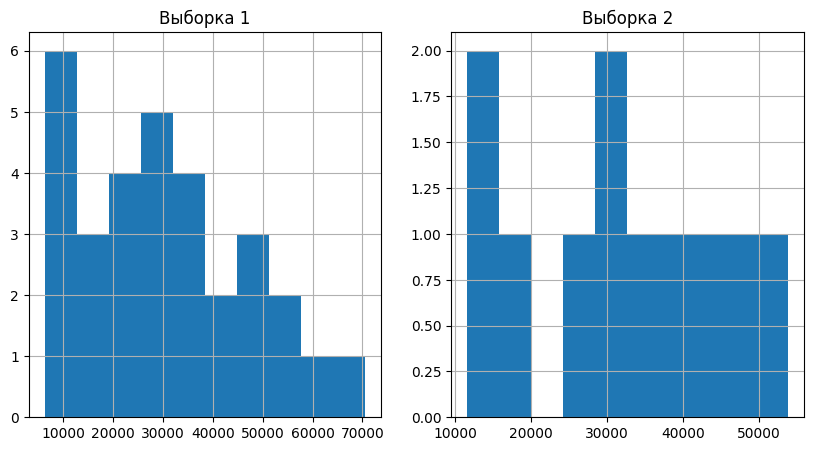

In [28]:
stat_tests.kolmog_smirn_test(target_train_1, target_test_1)
stat_tests.plot_test_hists(target_train_1, target_test_1)

In [29]:
init_cols = ['tpu id', 'tpu name', 'cluster']
utils_io.save_split_description(df_initial=data_initial,initial_columns=init_cols, target=target_train_1, df_name='X_train_1')
utils_io.save_split_description(df_initial=data_initial,initial_columns=init_cols, target=target_test_1, df_name='X_test_1')

pd.read_pickle('data/X_train_1_descr.pkl').head(3)

Файл data\X_train_1_descr.pkl сохранен!
Файл data\X_test_1_descr.pkl сохранен!


,tpu id,tpu name,cluster
112,3814,Бульвар Рокоссовского,0
12,269,Люблино,0
41,1175,Новогиреево,0


___
### <a id=5>Target 2</a>

In [30]:
px.box(target_2, orientation='h')

In [31]:
target_QUANT_25 = target_2.quantile(0.25)
target_QUANT_50 = target_2.quantile(0.50)
target_QUANT_75 = target_2.quantile(0.75)

target_QUANT_25, target_QUANT_50, target_QUANT_75

(2837.5, 4486.5, 6127.0)

In [32]:
df_strat_2 = df.copy()

df_strat_2['y_2_q'] = target_2.apply(lambda x: 0 if x < target_QUANT_25 else 1 if target_QUANT_25 < x < target_QUANT_50 else 2 if target_QUANT_50 < x < target_QUANT_75 else 3)

display(df_strat_2.head(3))
display(df_strat_2['y_2_q'].value_counts(normalize=True))


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,y_2_q
3,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000,3
4,45335.174628,10398.544866,13000.939690,2482.662990,5017.099687,84.212634,15864.423035,4375.824312,1
5,68245.683320,6203.287174,24894.587765,2581.202478,514547.171518,0.000000,51543.408128,0.000000,3


3    0.261905
0    0.261905
1    0.238095
2    0.238095
Name: y_2_q, dtype: float64

In [33]:
df_strat_2 = data_proc.get_stratified_df(X=df, feature=target_2)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,strat
3,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000,3
4,45335.174628,10398.544866,13000.939690,2482.662990,5017.099687,84.212634,15864.423035,4375.824312,1
5,68245.683320,6203.287174,24894.587765,2581.202478,514547.171518,0.000000,51543.408128,0.000000,3


3    0.261905
0    0.261905
1    0.238095
2    0.238095
Name: strat, dtype: float64

In [34]:
df_train_2, df_test_2, target_train_2, target_test_2 = train_test_split(df,
                                                                        target_2,
                                                                        stratify=df_strat_2[[
                                                                        # 'cluster',
                                                                        'strat',
                                                                        ]],
                                                                        test_size=0.25,
                                                                        random_state=0)

df_train_2.shape, df_test_2.shape, target_train_2.shape, target_test_2.shape

((31, 8), (11, 8), (31,), (11,))

In [35]:
px.box(target_train_2, orientation='h')

In [36]:
px.box(target_test_2, orientation='h')


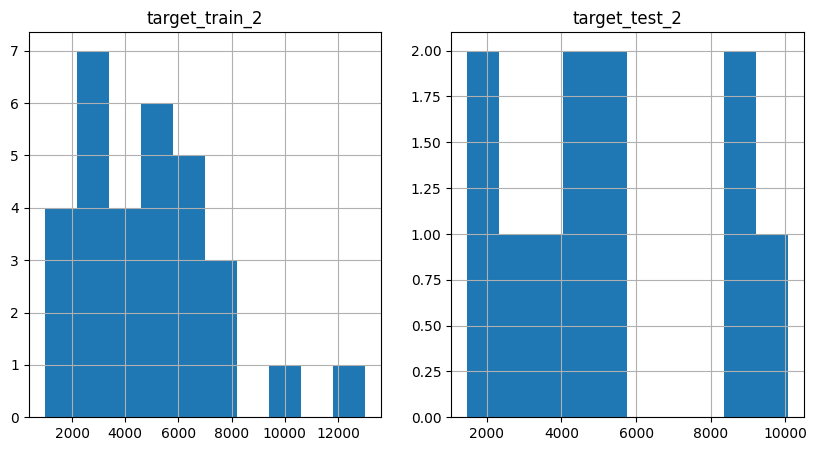

In [37]:
fig, ax = plt.subplots(1,2, figsize=[10, 5])
target_train_2.hist(ax=ax[0])
target_test_2.hist(ax=ax[1])
ax[0].set_title('target_train_2')
ax[1].set_title('target_test_2');

- тест Колмогорова–Смирнова на равенство распределения выборок

p-value=0.78508
Данные могут быть взяты из одного распределения


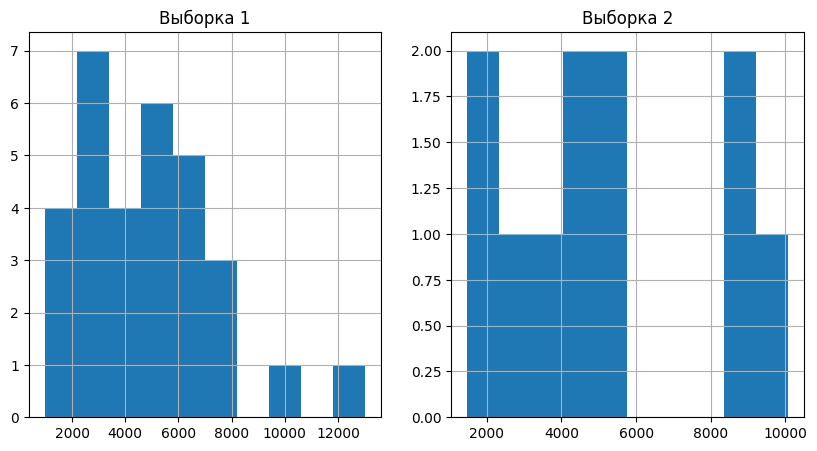

In [38]:
stat_tests.kolmog_smirn_test(target_train_2, target_test_2)
stat_tests.plot_test_hists(target_train_2, target_test_2)


___
### <a id=5>Target 3</a>

In [39]:
px.box(target_3, orientation='h')

In [40]:
target_QUANT_25 = target_3.quantile(0.25)
target_QUANT_50 = target_3.quantile(0.50)
target_QUANT_75 = target_3.quantile(0.75)

target_QUANT_25, target_QUANT_50, target_QUANT_75

(1109.25, 1989.5, 2541.75)

In [41]:
df_strat_3 = df.copy()

df_strat_3['y_3_q'] = target_3.apply(lambda x: 0 if x < target_QUANT_25 else 1 if target_QUANT_25 < x < target_QUANT_50 else 2 if target_QUANT_50 < x < target_QUANT_75 else 3)

display(df_strat_3.head(3))
display(df_strat_3['y_3_q'].value_counts(normalize=True))

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,y_3_q
3,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000,3
4,45335.174628,10398.544866,13000.939690,2482.662990,5017.099687,84.212634,15864.423035,4375.824312,1
5,68245.683320,6203.287174,24894.587765,2581.202478,514547.171518,0.000000,51543.408128,0.000000,3


3    0.261905
0    0.261905
1    0.238095
2    0.238095
Name: y_3_q, dtype: float64

In [42]:
df_strat_3 = data_proc.get_stratified_df(X=df, feature=target_3)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital,strat
3,85609.747000,59.610233,20973.161734,17.583812,104277.084316,0.000000,13759.054491,0.000000,3
4,45335.174628,10398.544866,13000.939690,2482.662990,5017.099687,84.212634,15864.423035,4375.824312,1
5,68245.683320,6203.287174,24894.587765,2581.202478,514547.171518,0.000000,51543.408128,0.000000,3


3    0.261905
0    0.261905
1    0.238095
2    0.238095
Name: strat, dtype: float64

In [43]:
df_train_3, df_test_3, target_train_3, target_test_3 = train_test_split(df,
                                                                        target_3,
                                                                        stratify=df_strat_3[[
                                                                        'strat',
                                                                        ]],
                                                                        test_size=0.25,
                                                                        random_state=4)

df_train_3.shape, df_test_3.shape, target_train_3.shape, target_test_3.shape

((31, 8), (11, 8), (31,), (11,))

In [44]:
px.box(target_train_3, orientation='h')


In [45]:
px.box(target_test_3, orientation='h')


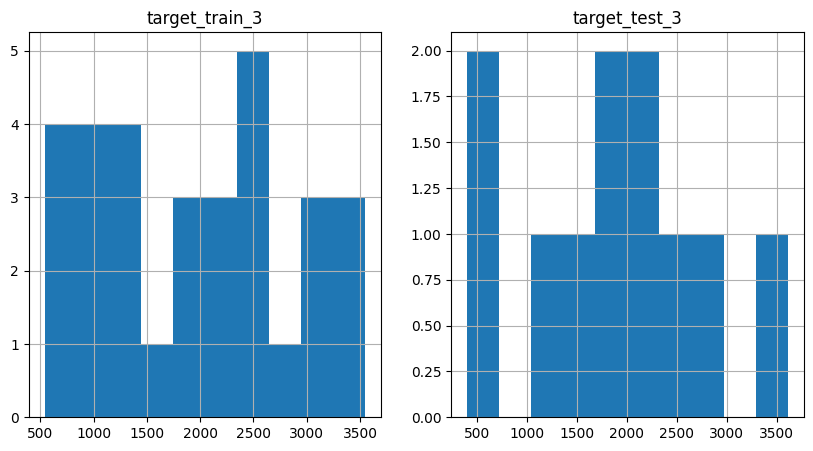

In [46]:
fig, ax = plt.subplots(1,2, figsize=[10, 5])
target_train_3.hist(ax=ax[0])
target_test_3.hist(ax=ax[1])
ax[0].set_title('target_train_3')
ax[1].set_title('target_test_3');

p-value=0.76999
Данные могут быть взяты из одного распределения


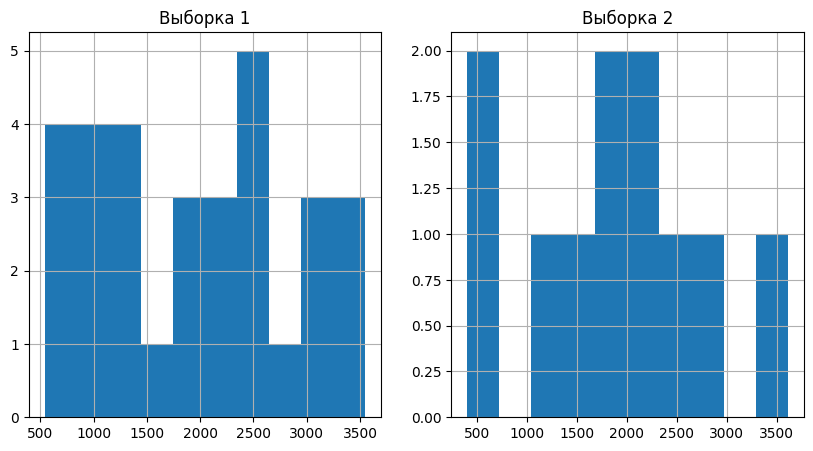

In [47]:
stat_tests.kolmog_smirn_test(target_train_3, target_test_3)
stat_tests.plot_test_hists(target_train_3, target_test_3)

___
## <center><a id=3 style='color:red'>Преобразование числовых признаков</a>

### <a id=5>Относительные признаки Target 1</a>

In [48]:
df_train_1.sample(1)

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,zone area shopping malls,area hospital,zone area hospital
37,30712.885342,978.634776,12452.325493,495.270861,156457.732852,0.0,88235.595279,1635.575493


___
### <a id=5>Стандартизация Target 1</a>


In [49]:
X_train_std_1, X_test_std_1 = data_proc.df_scaling(
    df_train_1,
    df_test_1,
    numerical_columns=numerical_columns,
    scaler=StandardScaler())

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0
mean,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.5,-0.7,-1.5,-0.7,-0.8,-1.0,-0.4
25%,-0.8,-0.7,-0.8,-0.7,-0.7,-0.8,-0.4
50%,-0.3,-0.4,-0.1,-0.5,-0.2,-0.3,-0.4
75%,0.6,0.2,0.7,0.2,0.1,0.4,-0.1
max,2.2,2.8,2.0,2.9,3.9,2.7,4.5


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.2,-0.3,0.2,-0.2,0.0,0.4,0.2
std,0.7,0.5,0.6,0.5,0.9,1.2,1.6
min,-0.9,-0.7,-0.7,-0.7,-0.8,-0.9,-0.4
25%,-0.3,-0.7,-0.1,-0.7,-0.6,-0.6,-0.4
50%,0.4,-0.3,0.2,-0.2,-0.3,-0.1,-0.3
75%,0.6,-0.2,0.6,-0.1,0.3,1.3,-0.1
max,1.5,0.9,1.2,1.1,2.0,2.9,4.8


### <a id=5>Нормализация Target 1</a>

In [50]:
X_train_mm_1, X_test_mm_1 = data_proc.df_scaling(
    df_train_1,
    df_test_1,
    numerical_columns=numerical_columns,
    scaler=MinMaxScaler())

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0
mean,0.4,0.2,0.4,0.2,0.2,0.3,0.1
std,0.3,0.3,0.3,0.3,0.2,0.3,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.2,0.0,0.0,0.1,0.0
50%,0.3,0.1,0.4,0.1,0.1,0.2,0.0
75%,0.6,0.2,0.6,0.3,0.2,0.4,0.1
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.5,0.1,0.5,0.1,0.2,0.4,0.1
std,0.2,0.1,0.2,0.1,0.2,0.3,0.3
min,0.2,0.0,0.2,0.0,-0.0,0.0,0.0
25%,0.3,0.0,0.4,0.0,0.0,0.1,0.0
50%,0.5,0.1,0.5,0.2,0.1,0.2,0.0
75%,0.6,0.1,0.6,0.2,0.2,0.6,0.1
max,0.8,0.5,0.8,0.5,0.6,1.1,1.1


### <a id=5>Стандартизация Target 2</a>

In [51]:
X_train_std_2, X_test_std_2 = data_proc.df_scaling(
    df_train_2,
    df_test_2,
    numerical_columns=numerical_columns,
    scaler=StandardScaler())

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0
mean,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-0.7,-1.7,-0.8,-0.8,-1.0,-0.4
25%,-0.8,-0.7,-0.9,-0.8,-0.6,-0.8,-0.4
50%,-0.2,-0.3,-0.0,-0.5,-0.2,-0.4,-0.4
75%,0.5,0.3,0.6,0.4,0.0,0.9,-0.1
max,2.4,2.8,2.0,2.2,3.7,2.4,4.9


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.1,-0.0,0.2,0.0,0.0,-0.3,0.5
std,1.2,1.1,1.1,1.2,0.6,0.6,1.8
min,-1.2,-0.7,-1.5,-0.8,-0.8,-1.0,-0.4
25%,-0.7,-0.7,-0.7,-0.7,-0.6,-0.8,-0.4
50%,-0.3,-0.4,0.2,-0.1,0.1,-0.2,-0.3
75%,0.9,-0.1,1.0,0.0,0.5,0.1,0.1
max,2.2,3.2,2.3,3.4,1.1,0.8,5.3


### <a id=5>Нормализация Target 2</a>

In [52]:
X_train_mm_2, X_test_mm_2 = data_proc.df_scaling(
    df_train_2,
    df_test_2,
    numerical_columns=numerical_columns,
    scaler=MinMaxScaler())

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0
mean,0.4,0.2,0.5,0.3,0.2,0.3,0.1
std,0.3,0.3,0.3,0.3,0.2,0.3,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.0,0.2,0.0,0.0,0.1,0.0
50%,0.4,0.1,0.5,0.1,0.1,0.2,0.0
75%,0.5,0.3,0.6,0.4,0.2,0.6,0.1
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.4,0.2,0.5,0.3,0.2,0.2,0.2
std,0.3,0.3,0.3,0.4,0.1,0.2,0.3
min,0.1,0.0,0.1,0.0,-0.0,-0.0,0.0
25%,0.2,0.0,0.3,0.0,0.0,0.1,0.0
50%,0.3,0.1,0.5,0.2,0.2,0.2,0.0
75%,0.6,0.2,0.7,0.3,0.3,0.3,0.1
max,1.0,1.1,1.1,1.4,0.4,0.5,1.1


### <a id=5>Стандартизация Target 3</a>

In [53]:
X_train_std_3, X_test_std_3 = data_proc.df_scaling(
    df_train_3,
    df_test_3,
    numerical_columns=numerical_columns,
    scaler=StandardScaler())

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.3,-0.6,-1.6,-0.7,-0.8,-1.0,-0.5
25%,-0.9,-0.6,-0.8,-0.7,-0.7,-0.8,-0.5
50%,-0.2,-0.3,-0.1,-0.2,-0.4,-0.3,-0.5
75%,0.6,0.1,0.7,0.1,0.2,0.5,-0.1
max,2.2,3.3,2.2,3.2,3.8,2.6,3.5


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.1,0.2,-0.0,-0.0,-0.2,0.6,-0.3
std,1.3,1.1,1.2,0.9,0.8,1.5,0.3
min,-1.7,-0.6,-1.8,-0.7,-0.8,-0.9,-0.5
25%,-0.7,-0.6,-1.0,-0.7,-0.7,-0.5,-0.5
50%,0.3,-0.0,0.0,-0.2,-0.2,0.1,-0.5
75%,0.6,0.6,0.6,0.2,-0.1,1.5,-0.3
max,2.4,2.9,2.0,2.0,2.0,3.3,0.5


### <a id=5>Нормализация Target 3</a>

In [54]:
X_train_mm_3, X_test_mm_3 = data_proc.df_scaling(
    df_train_3,
    df_test_3,
    numerical_columns=numerical_columns,
    scaler=MinMaxScaler())

,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,31.0,31.0,31.0,31.0,31.0,31.0,31.0
mean,0.4,0.2,0.4,0.2,0.2,0.3,0.1
std,0.3,0.3,0.3,0.3,0.2,0.3,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.0,0.2,0.0,0.0,0.1,0.0
50%,0.3,0.1,0.4,0.1,0.1,0.2,0.0
75%,0.5,0.2,0.6,0.2,0.2,0.4,0.1
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,gsm population,gsm zone mcd population,gsm workplaces,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,0.4,0.2,0.4,0.2,0.1,0.5,0.0
std,0.4,0.3,0.3,0.2,0.2,0.4,0.1
min,-0.1,0.0,-0.1,0.0,0.0,0.1,0.0
25%,0.2,0.0,0.1,0.0,0.0,0.1,0.0
50%,0.4,0.1,0.4,0.1,0.1,0.3,0.0
75%,0.5,0.3,0.6,0.2,0.2,0.7,0.0
max,1.1,0.9,0.9,0.7,0.6,1.2,0.2


___
## <center><a id=3 style='color:red'>Корреляция</a>

### <a id=5>Target 1</a>

,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,zone area hospital,area hospital,area shopping malls
VIF,5.399497,5.372435,1.380587,1.284286,1.153296


,gsm zone mcd workplaces,gsm workplaces_gsm zone mcd population,area hospital,area shopping malls,zone area hospital
VIF,7.459925,6.215215,3.735693,2.327255,1.316516


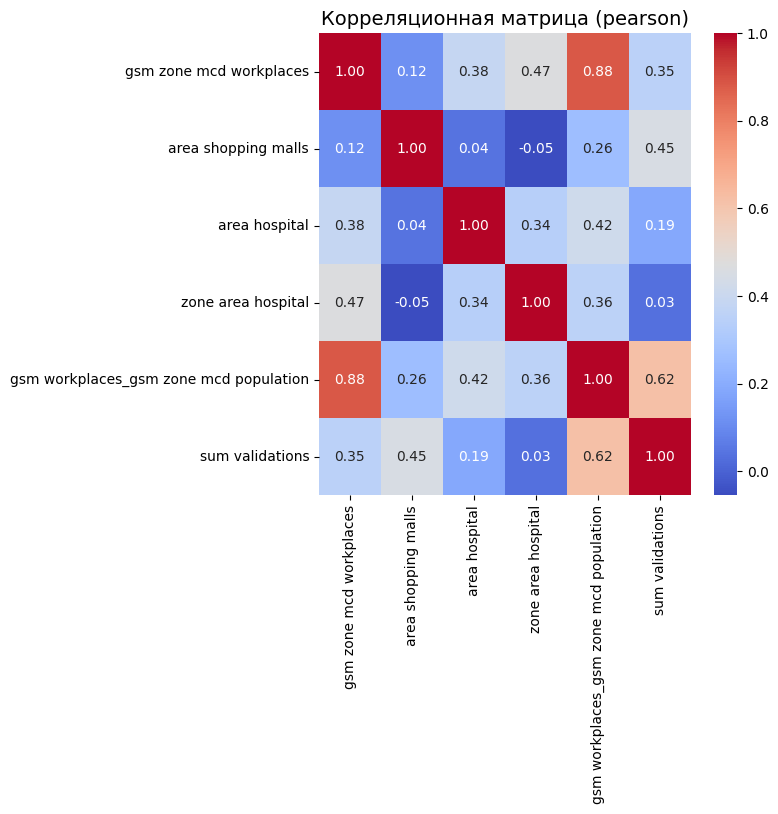

Ранг корреляционной матрицы: 5
Размер корреляционной матрицы: 5x5
Детерминант корреляционной матрицы: 0.115


In [55]:
columns_drop = ['gsm population']
columns_pca = {'gsm workplaces_gsm zone mcd population': ['gsm workplaces', 'gsm zone mcd population']
            }

X_train_std_drop_1 = X_train_std_1.drop(columns=columns_drop)
X_test_std_drop_1 = X_test_std_1.drop(columns=columns_drop)

X_train_corr_1, X_test_corr_1 = data_proc.get_pca(X_train_std_drop_1, X_test_std_drop_1,
                                    columns_pca=columns_pca)
vif_1 = data_proc.get_VIF(X_train_corr_1)
vif_2 = data_proc.get_VIF(X_test_corr_1)
data_proc.plot_corrmatrix(X_train_corr_1, target=target_train_1, calc_det=True)

### <a id=5>Target 2</a>

,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,zone area hospital,area hospital,area shopping malls
VIF,4.955769,4.805889,1.45364,1.270006,1.247897


,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,area hospital,area shopping malls,zone area hospital
VIF,6.844229,5.896048,5.342901,3.240184,2.16403


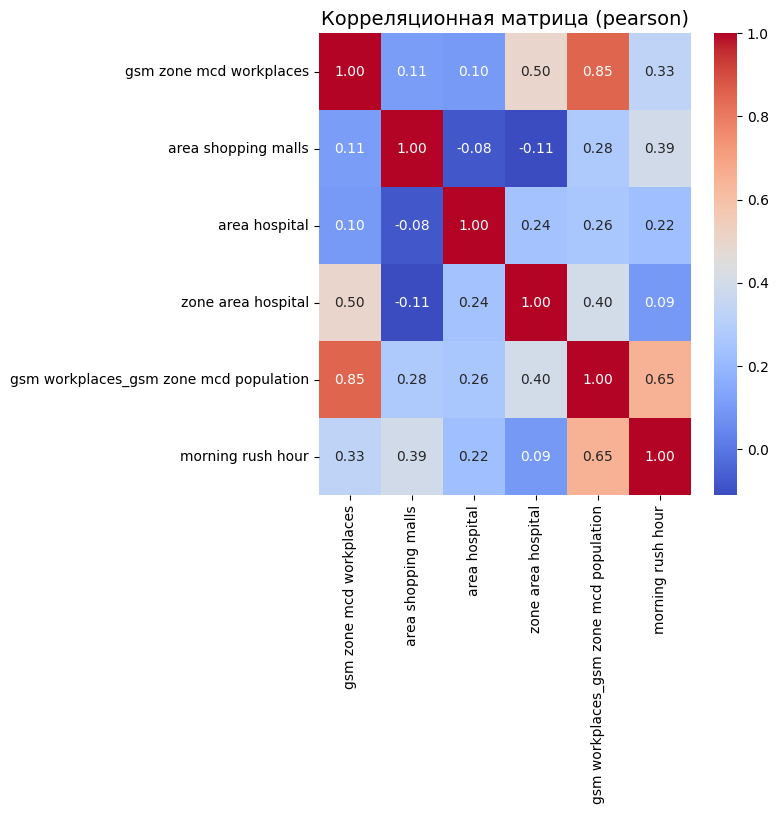

Ранг корреляционной матрицы: 5
Размер корреляционной матрицы: 5x5
Детерминант корреляционной матрицы: 0.135


In [56]:
columns_drop = ['gsm population']
columns_pca = {'gsm workplaces_gsm zone mcd population': ['gsm workplaces', 'gsm zone mcd population']
            }

X_train_std_drop_2 = X_train_std_2.drop(columns=columns_drop)
X_test_std_drop_2 = X_test_std_2.drop(columns=columns_drop)

X_train_corr_2, X_test_corr_2 = data_proc.get_pca(X_train_std_drop_2, X_test_std_drop_2,
                                    columns_pca=columns_pca)
vif_2 = data_proc.get_VIF(X_train_corr_2)
vif_2 = data_proc.get_VIF(X_test_corr_2)
data_proc.plot_corrmatrix(X_train_corr_2, target=target_train_2, calc_det=True)

### <a id=5>Target 3</a>

,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,area hospital,zone area hospital,area shopping malls
VIF,5.672954,4.5288,1.869182,1.34818,1.134092


,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,area shopping malls,area hospital,zone area hospital
VIF,10.318197,10.004664,2.37099,1.698829,1.338483


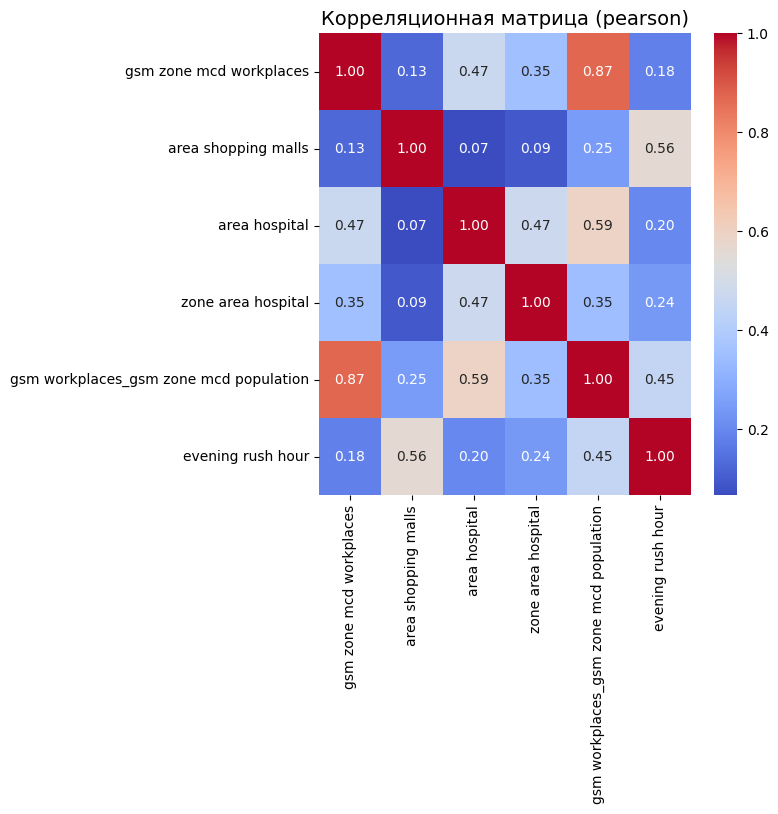

Ранг корреляционной матрицы: 5
Размер корреляционной матрицы: 5x5
Детерминант корреляционной матрицы: 0.102


In [57]:
columns_drop = ['gsm population']
columns_pca = {'gsm workplaces_gsm zone mcd population': ['gsm workplaces', 'gsm zone mcd population']
            }

X_train_std_drop_3 = X_train_std_3.drop(columns=columns_drop)
X_test_std_drop_3 = X_test_std_3.drop(columns=columns_drop)

X_train_corr_3, X_test_corr_3 = data_proc.get_pca(X_train_std_drop_3, X_test_std_drop_3,
                                    columns_pca=columns_pca)
vif_3 = data_proc.get_VIF(X_train_corr_3)
vif_2 = data_proc.get_VIF(X_test_corr_3)
data_proc.plot_corrmatrix(X_train_corr_3, target=target_train_3, calc_det=True)

___
## <center><a id=3 style='color:red'>Полиномиальные факторы</a>

### <a id=5>Target 1</a>

In [58]:
X_train_poly_1, X_test_poly_1 = data_proc.get_polyfeatures(X_train_corr_1, X_test_corr_1)

X_train_poly_1.shape, X_test_poly_1.shape

((31, 20), (11, 20))

,gsm zone mcd workplaces gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population^2,gsm zone mcd workplaces zone area hospital,gsm zone mcd workplaces^2,zone area hospital gsm workplaces_gsm zone mcd population,area hospital zone area hospital,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,gsm zone mcd workplaces area hospital,area hospital gsm workplaces_gsm zone mcd population,area hospital^2,area shopping malls gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces area shopping malls,area shopping malls^2
VIF,273.990626,118.474314,109.759253,89.013752,68.499007,56.447148,14.665027,14.516019,12.732632,6.018737,5.091477,3.352846,3.057529,1.986192


c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



,gsm zone mcd workplaces,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces^2,gsm zone mcd workplaces area shopping malls,gsm zone mcd workplaces area hospital,gsm zone mcd workplaces zone area hospital,gsm zone mcd workplaces gsm workplaces_gsm zone mcd population,area shopping malls^2,area shopping malls gsm workplaces_gsm zone mcd population,area hospital^2,area hospital zone area hospital,area hospital gsm workplaces_gsm zone mcd population,zone area hospital gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population^2
VIF,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


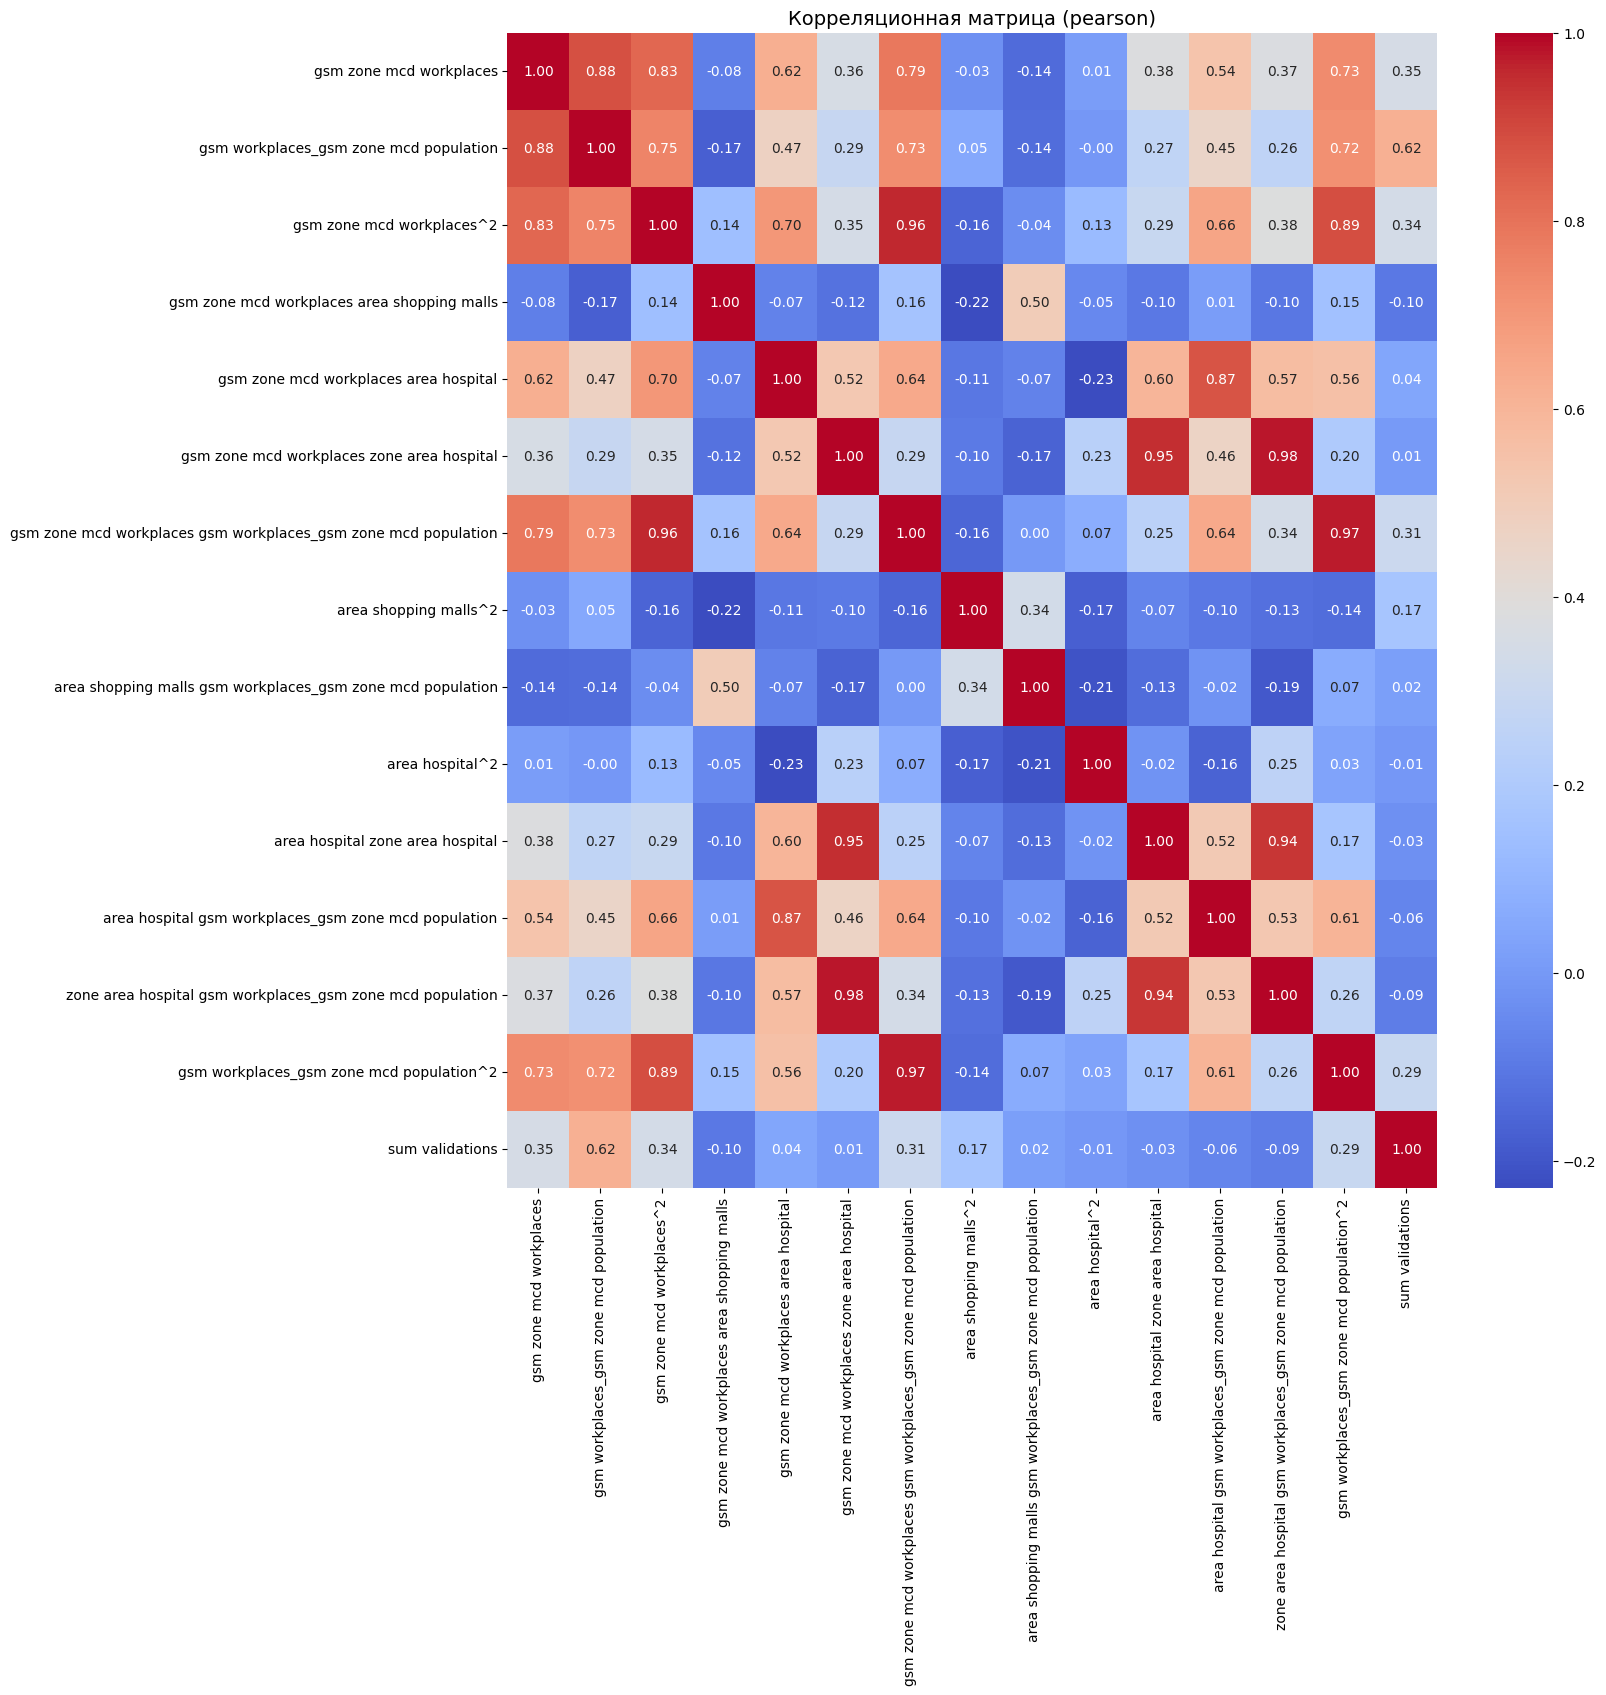

Ранг корреляционной матрицы: 14
Размер корреляционной матрицы: 14x14
Детерминант корреляционной матрицы: 0.000


In [59]:
columns_drop = [
    "zone area hospital^2",
    "zone area hospital",
    "area shopping malls zone area hospital",
    "area shopping malls",
    "area hospital",
    "area shopping malls area hospital",
]


X_train_poly_corr_1 = X_train_poly_1.drop(columns=columns_drop)

X_test_poly_corr_1 = X_test_poly_1.drop(columns=columns_drop)

vif_1 = data_proc.get_VIF(X_train_poly_corr_1)

vif_2 = data_proc.get_VIF(X_test_poly_corr_1)

data_proc.plot_corrmatrix(X_train_poly_corr_1, target=target_1, calc_det=True)

### <a id=5>Target 2</a>

In [60]:
X_train_poly_2, X_test_poly_2 = data_proc.get_polyfeatures(X_train_corr_2, X_test_corr_2)

X_train_poly_2.shape, X_test_poly_2.shape

((31, 20), (11, 20))

,gsm zone mcd workplaces gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population^2,zone area hospital gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces zone area hospital,gsm zone mcd workplaces^2,area hospital zone area hospital,area shopping malls gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,gsm zone mcd workplaces area hospital,area hospital gsm workplaces_gsm zone mcd population,area hospital^2,area shopping malls^2,gsm zone mcd workplaces area shopping malls
VIF,483.027554,246.26087,126.654369,121.323684,91.781136,32.747319,11.862112,11.828324,10.563566,10.192538,6.600768,5.563391,2.491708,2.452207


c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



,gsm zone mcd workplaces,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces^2,gsm zone mcd workplaces area shopping malls,gsm zone mcd workplaces area hospital,gsm zone mcd workplaces zone area hospital,gsm zone mcd workplaces gsm workplaces_gsm zone mcd population,area shopping malls^2,area shopping malls gsm workplaces_gsm zone mcd population,area hospital^2,area hospital zone area hospital,area hospital gsm workplaces_gsm zone mcd population,zone area hospital gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population^2
VIF,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


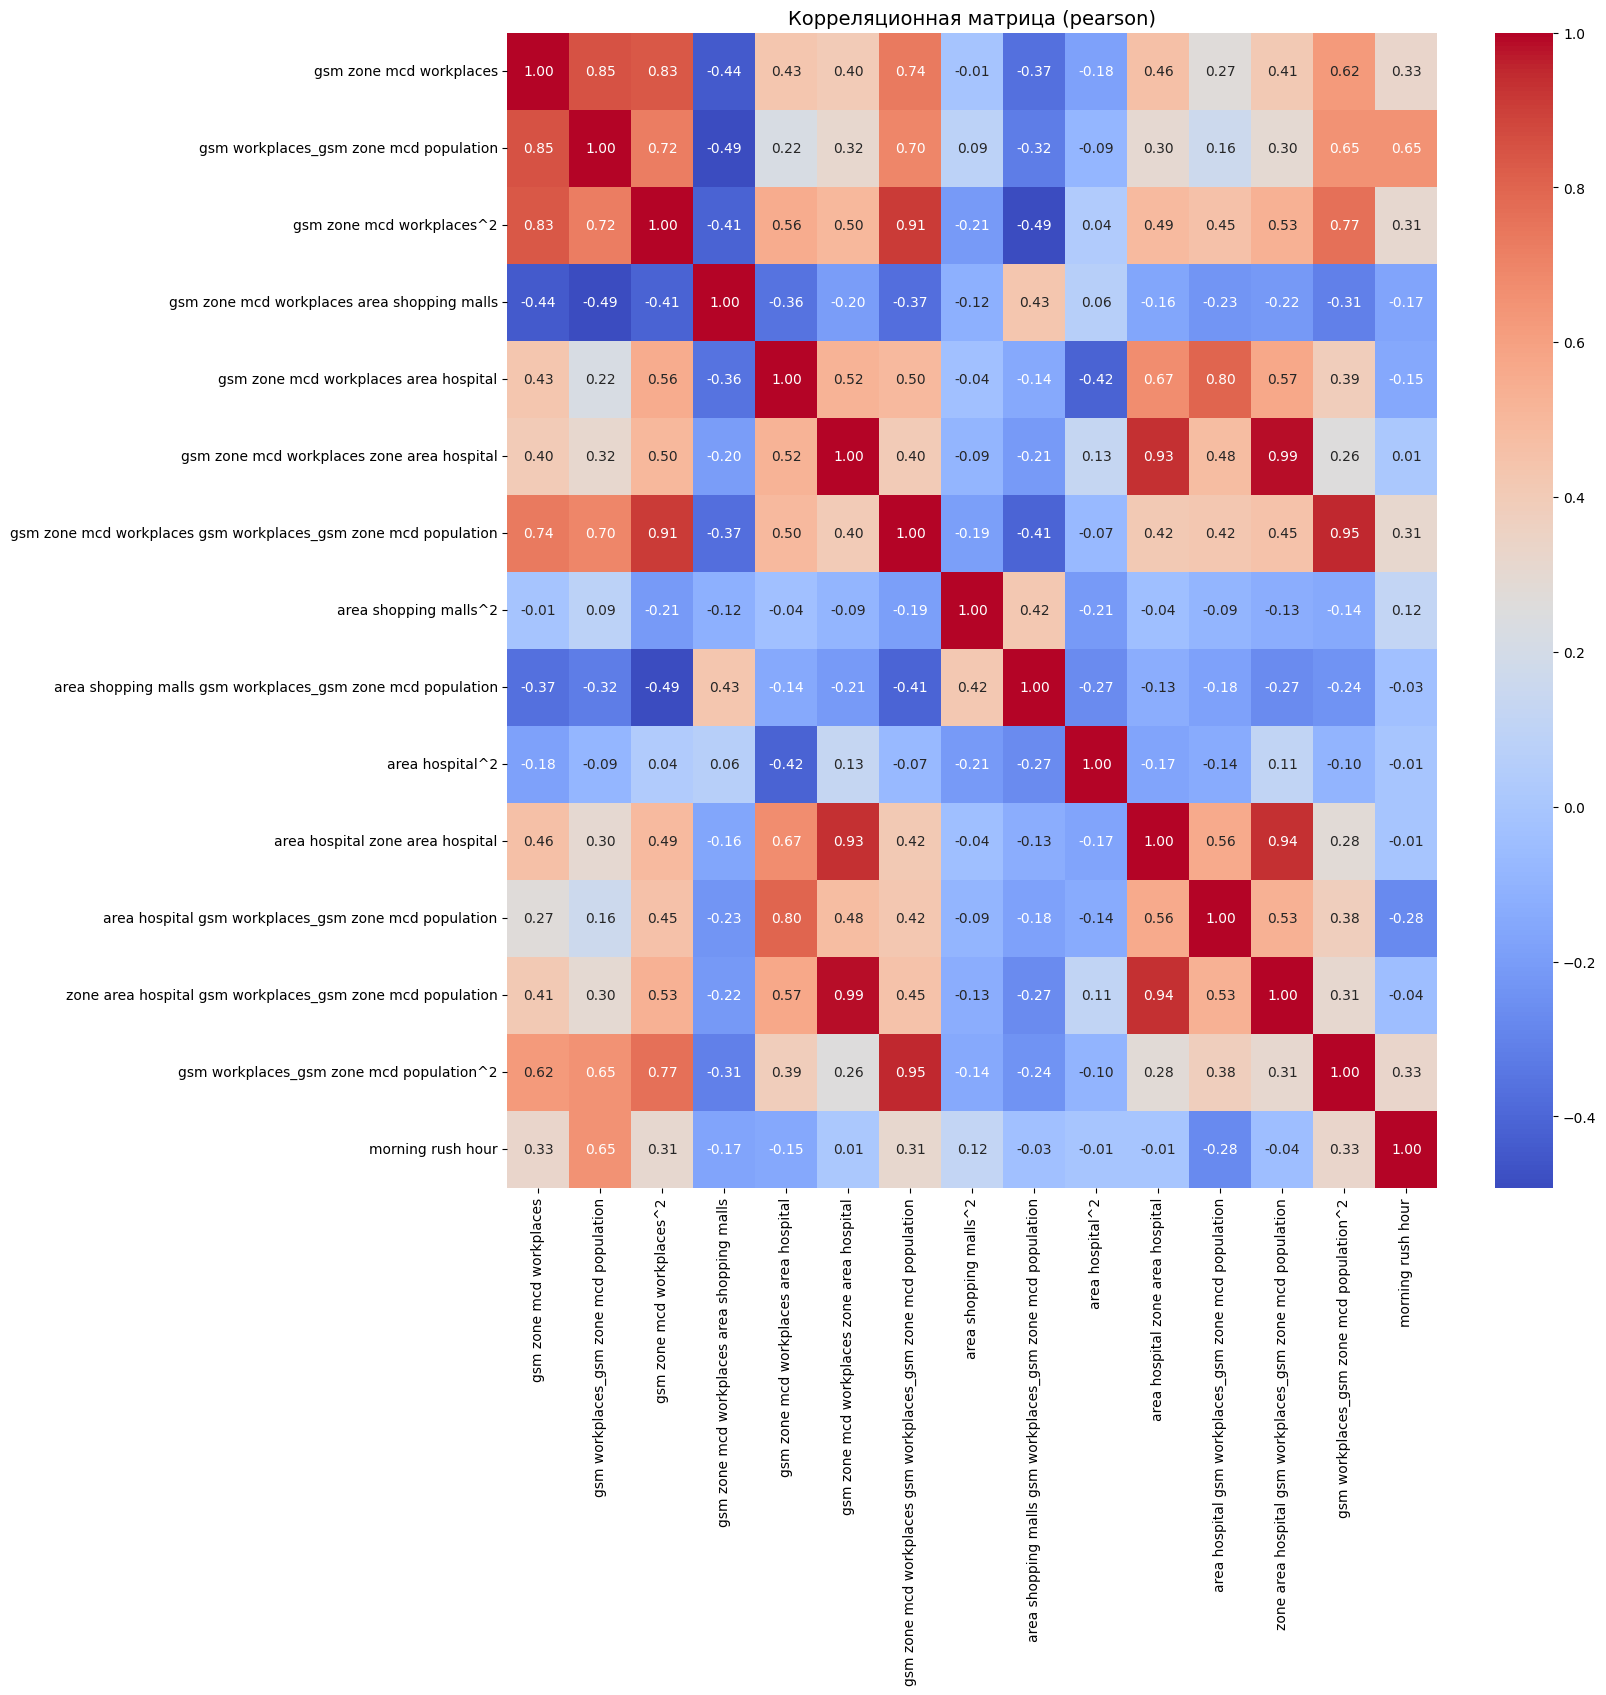

Ранг корреляционной матрицы: 14
Размер корреляционной матрицы: 14x14
Детерминант корреляционной матрицы: 0.000


In [61]:
columns_drop = [
    "zone area hospital^2",
    "zone area hospital",
    "area shopping malls zone area hospital",
    "area shopping malls",
    "area hospital",
    "area shopping malls area hospital",
]


X_train_poly_corr_2 = X_train_poly_2.drop(columns=columns_drop)

X_test_poly_corr_2 = X_test_poly_2.drop(columns=columns_drop)

vif_1 = data_proc.get_VIF(X_train_poly_corr_2)

vif_2 = data_proc.get_VIF(X_test_poly_corr_2)

data_proc.plot_corrmatrix(X_train_poly_corr_2, target=target_2, calc_det=True)

### <a id=5>Target 3</a>


In [62]:
X_train_poly_3, X_test_poly_3 = data_proc.get_polyfeatures(X_train_corr_3, X_test_corr_3)

X_train_poly_3.shape, X_test_poly_3.shape

((31, 20), (11, 20))

,gsm zone mcd workplaces gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population^2,zone area hospital gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces^2,gsm zone mcd workplaces zone area hospital,area hospital gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces area hospital,area hospital zone area hospital,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces,area hospital^2,area shopping malls gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces area shopping malls,area shopping malls^2
VIF,349.819861,241.212526,100.241864,90.064195,40.464887,39.560489,23.492072,23.23419,22.731334,11.26084,8.278143,4.590768,3.39322,2.433286


c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide



,gsm zone mcd workplaces,gsm workplaces_gsm zone mcd population,gsm zone mcd workplaces^2,gsm zone mcd workplaces area shopping malls,gsm zone mcd workplaces area hospital,gsm zone mcd workplaces zone area hospital,gsm zone mcd workplaces gsm workplaces_gsm zone mcd population,area shopping malls^2,area shopping malls gsm workplaces_gsm zone mcd population,area hospital^2,area hospital zone area hospital,area hospital gsm workplaces_gsm zone mcd population,zone area hospital gsm workplaces_gsm zone mcd population,gsm workplaces_gsm zone mcd population^2
VIF,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


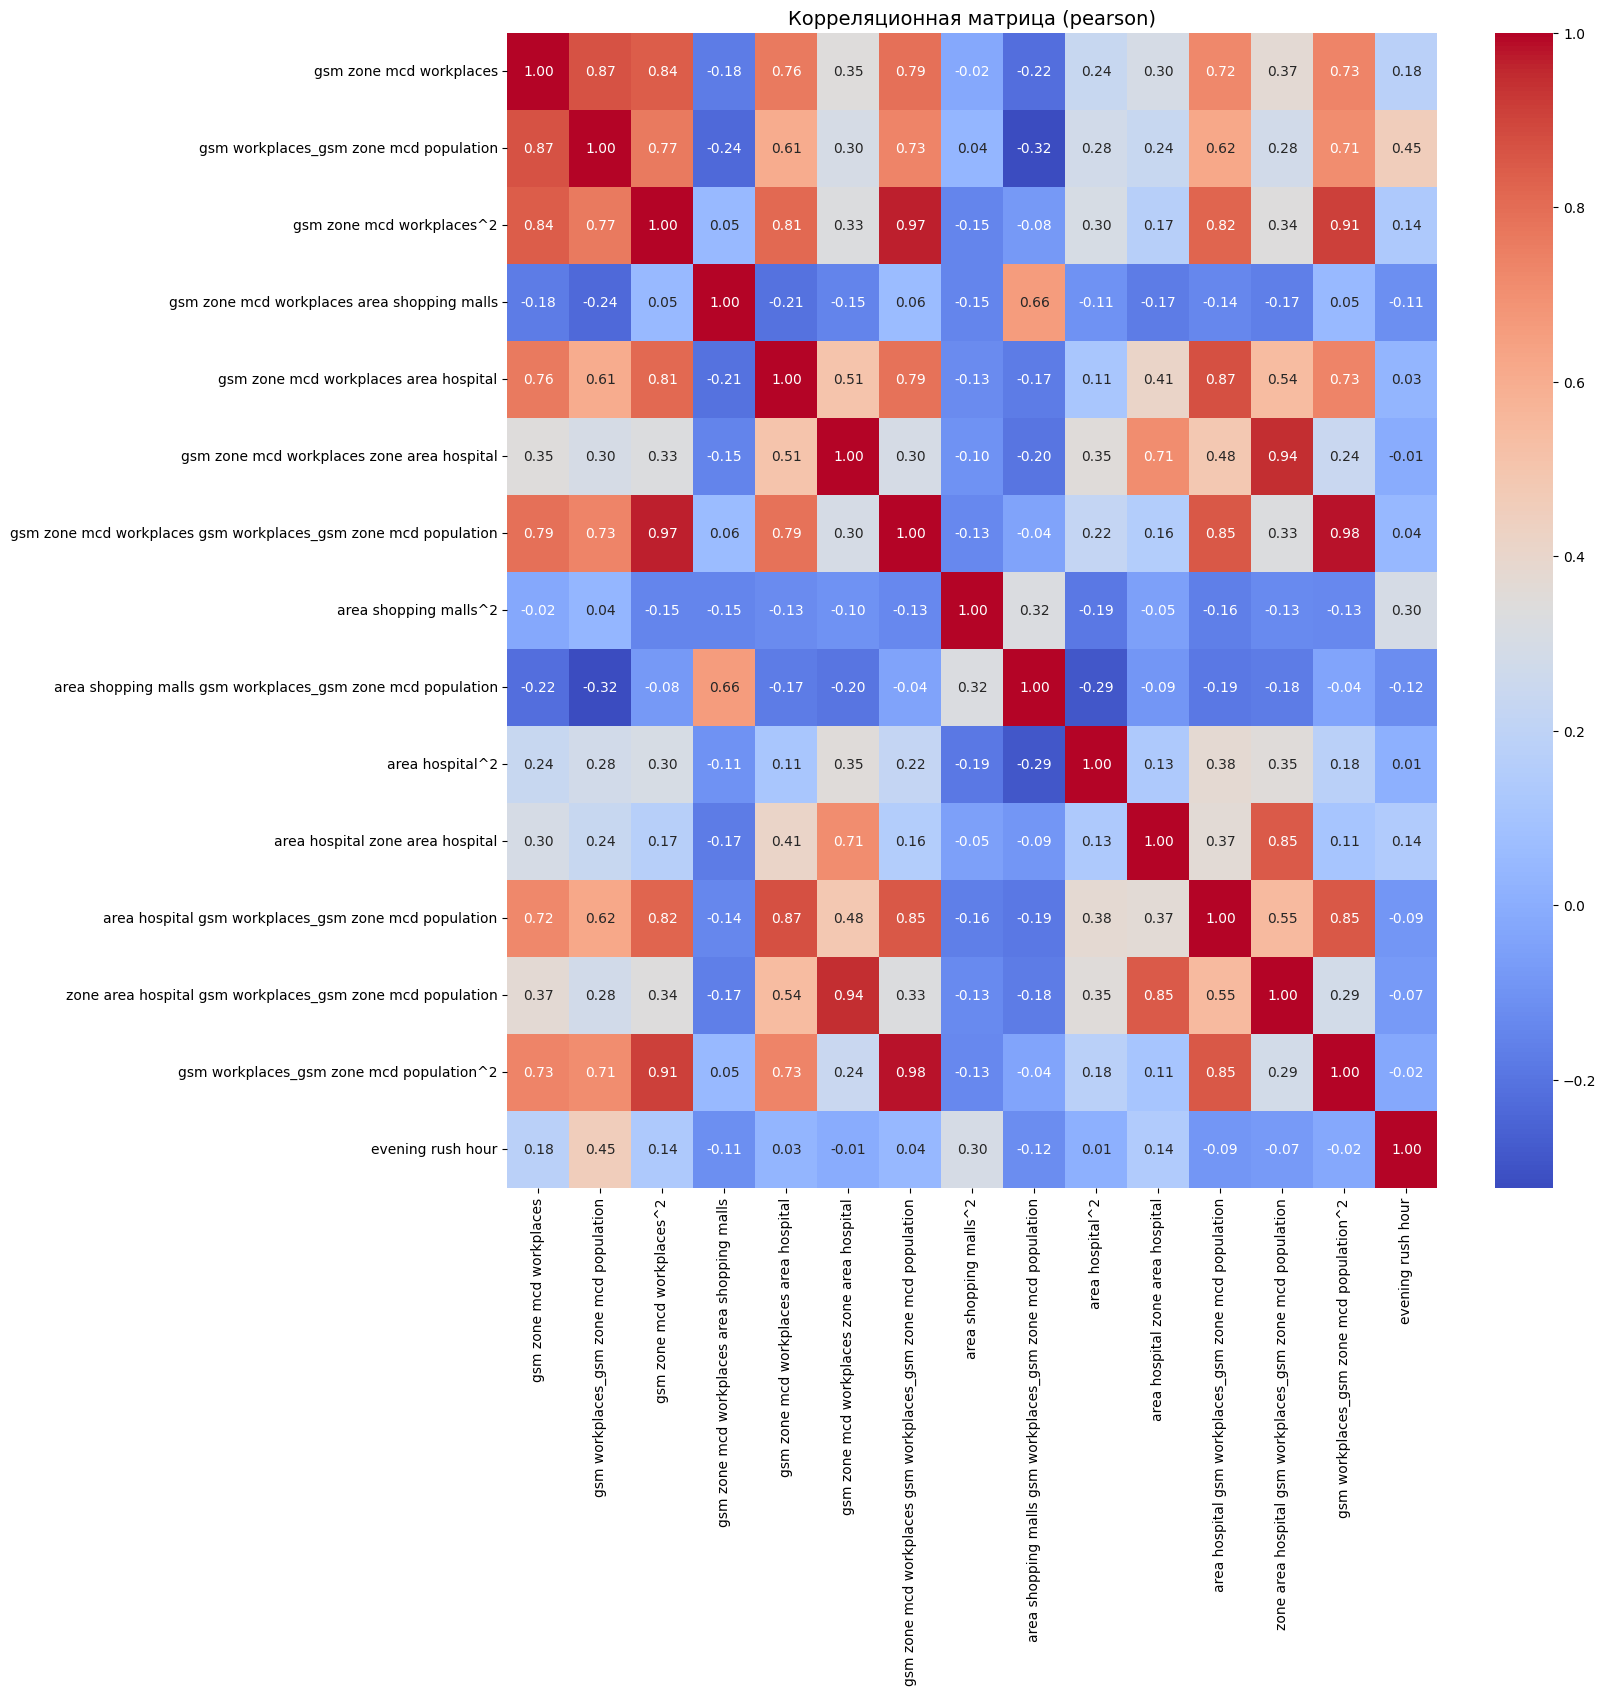

Ранг корреляционной матрицы: 14
Размер корреляционной матрицы: 14x14
Детерминант корреляционной матрицы: 0.000


In [63]:
columns_drop = [
    "zone area hospital^2",
    "zone area hospital",
    "area shopping malls zone area hospital",
    "area shopping malls",
    "area hospital",
    "area shopping malls area hospital",
]


X_train_poly_corr_3 = X_train_poly_3.drop(columns=columns_drop)

X_test_poly_corr_3 = X_test_poly_3.drop(columns=columns_drop)

vif_1 = data_proc.get_VIF(X_train_poly_corr_3)

vif_2 = data_proc.get_VIF(X_test_poly_corr_3)

data_proc.plot_corrmatrix(X_train_poly_corr_3, target=target_3, calc_det=True)

___
## <center><a id=3 style='color:red'>Сохранение данных</a>

___
___

In [64]:
DIR = 'train/'
FILE_DICT = {
            'X_train_1': df_train_1,
            'target_train_1': target_train_1,
            'X_train_2': df_train_2,
            'target_train_2': target_train_2,
            'X_train_3': df_train_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train/X_train_1.pkl успешно сохранён.
Файл data/train/target_train_1.pkl успешно сохранён.
Файл data/train/X_train_2.pkl успешно сохранён.
Файл data/train/target_train_2.pkl успешно сохранён.
Файл data/train/X_train_3.pkl успешно сохранён.
Файл data/train/target_train_3.pkl успешно сохранён.


In [65]:
DIR = 'test/'
FILE_DICT = {
            'X_test_1': df_test_1,
            'target_test_1': target_test_1,
            'X_test_2': df_test_2,
            'target_test_2': target_test_2,
            'X_test_3': df_test_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test/X_test_1.pkl успешно сохранён.
Файл data/test/target_test_1.pkl успешно сохранён.
Файл data/test/X_test_2.pkl успешно сохранён.
Файл data/test/target_test_2.pkl успешно сохранён.
Файл data/test/X_test_3.pkl успешно сохранён.
Файл data/test/target_test_3.pkl успешно сохранён.


____

In [66]:
DIR = 'train_std/'
FILE_DICT = {
            'X_train_std_1': X_train_std_1,
            'target_train_1': target_train_1,
            'X_train_std_2': X_train_std_2,
            'target_train_2': target_train_2,
            'X_train_std_3': X_train_std_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_std/X_train_std_1.pkl успешно сохранён.
Файл data/train_std/target_train_1.pkl успешно сохранён.
Файл data/train_std/X_train_std_2.pkl успешно сохранён.
Файл data/train_std/target_train_2.pkl успешно сохранён.
Файл data/train_std/X_train_std_3.pkl успешно сохранён.
Файл data/train_std/target_train_3.pkl успешно сохранён.


In [67]:
DIR = 'test_std/'
FILE_DICT = {
            'X_test_std_1': X_test_std_1,
            'target_test_1': target_test_1,
            'X_test_std_2': X_test_std_2,
            'target_test_2': target_test_2,
            'X_test_std_3': X_test_std_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_std/X_test_std_1.pkl успешно сохранён.
Файл data/test_std/target_test_1.pkl успешно сохранён.
Файл data/test_std/X_test_std_2.pkl успешно сохранён.
Файл data/test_std/target_test_2.pkl успешно сохранён.
Файл data/test_std/X_test_std_3.pkl успешно сохранён.
Файл data/test_std/target_test_3.pkl успешно сохранён.


___

In [68]:
DIR = 'train_mm/'
FILE_DICT = {
            'X_train_mm_1': X_train_mm_1,
            'target_train_1': target_train_1,
            'X_train_mm_2': X_train_mm_2,
            'target_train_2': target_train_2,
            'X_train_mm_3': X_train_mm_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_mm/X_train_mm_1.pkl успешно сохранён.
Файл data/train_mm/target_train_1.pkl успешно сохранён.
Файл data/train_mm/X_train_mm_2.pkl успешно сохранён.
Файл data/train_mm/target_train_2.pkl успешно сохранён.
Файл data/train_mm/X_train_mm_3.pkl успешно сохранён.
Файл data/train_mm/target_train_3.pkl успешно сохранён.


In [69]:
DIR = 'test_mm/'
FILE_DICT = {
            'X_test_mm_1': X_test_mm_1,
            'target_test_1': target_test_1,
            'X_test_mm_2': X_test_mm_2,
            'target_test_2': target_test_2,
            'X_test_mm_3': X_test_mm_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_mm/X_test_mm_1.pkl успешно сохранён.
Файл data/test_mm/target_test_1.pkl успешно сохранён.
Файл data/test_mm/X_test_mm_2.pkl успешно сохранён.
Файл data/test_mm/target_test_2.pkl успешно сохранён.
Файл data/test_mm/X_test_mm_3.pkl успешно сохранён.
Файл data/test_mm/target_test_3.pkl успешно сохранён.


___

___

In [70]:
DIR = 'train_corr/'
FILE_DICT = {
            'X_train_corr_1': X_train_corr_1,
            'target_train_1': target_train_1,
            'X_train_corr_2': X_train_corr_2,
            'target_train_2': target_train_2,
            'X_train_corr_3': X_train_corr_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_corr/X_train_corr_1.pkl успешно сохранён.
Файл data/train_corr/target_train_1.pkl успешно сохранён.
Файл data/train_corr/X_train_corr_2.pkl успешно сохранён.
Файл data/train_corr/target_train_2.pkl успешно сохранён.
Файл data/train_corr/X_train_corr_3.pkl успешно сохранён.
Файл data/train_corr/target_train_3.pkl успешно сохранён.


In [71]:
DIR = 'test_corr/'
FILE_DICT = {
            'X_test_corr_1': X_test_corr_1,
            'target_test_1': target_test_1,
            'X_test_corr_2': X_test_corr_2,
            'target_test_2': target_test_2,
            'X_test_corr_3': X_test_corr_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_corr/X_test_corr_1.pkl успешно сохранён.
Файл data/test_corr/target_test_1.pkl успешно сохранён.
Файл data/test_corr/X_test_corr_2.pkl успешно сохранён.
Файл data/test_corr/target_test_2.pkl успешно сохранён.
Файл data/test_corr/X_test_corr_3.pkl успешно сохранён.
Файл data/test_corr/target_test_3.pkl успешно сохранён.


___

In [72]:
DIR = 'train_poly/'
FILE_DICT = {
            'X_train_poly_1': X_train_poly_1,
            'target_train_1': target_train_1,
            'X_train_poly_2': X_train_poly_2,
            'target_train_2': target_train_2,
            'X_train_poly_3': X_train_poly_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_poly/X_train_poly_1.pkl успешно сохранён.
Файл data/train_poly/target_train_1.pkl успешно сохранён.
Файл data/train_poly/X_train_poly_2.pkl успешно сохранён.
Файл data/train_poly/target_train_2.pkl успешно сохранён.
Файл data/train_poly/X_train_poly_3.pkl успешно сохранён.
Файл data/train_poly/target_train_3.pkl успешно сохранён.


In [73]:
DIR = 'test_poly/'
FILE_DICT = {
            'X_test_poly_1': X_test_poly_1,
            'target_test_1': target_test_1,
            'X_test_poly_2': X_test_poly_2,
            'target_test_2': target_test_2,
            'X_test_poly_3': X_test_poly_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_poly/X_test_poly_1.pkl успешно сохранён.
Файл data/test_poly/target_test_1.pkl успешно сохранён.
Файл data/test_poly/X_test_poly_2.pkl успешно сохранён.
Файл data/test_poly/target_test_2.pkl успешно сохранён.
Файл data/test_poly/X_test_poly_3.pkl успешно сохранён.
Файл data/test_poly/target_test_3.pkl успешно сохранён.


___

In [74]:
DIR = 'train_poly_corr/'
FILE_DICT = {
            'X_train_poly_corr_1': X_train_poly_corr_1,
            'target_train_1': target_train_1,
            'X_train_poly_corr_2': X_train_poly_corr_2,
            'target_train_2': target_train_2,
            'X_train_poly_corr_3': X_train_poly_corr_3,
            'target_train_3': target_train_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/train_poly_corr/X_train_poly_corr_1.pkl успешно сохранён.
Файл data/train_poly_corr/target_train_1.pkl успешно сохранён.
Файл data/train_poly_corr/X_train_poly_corr_2.pkl успешно сохранён.
Файл data/train_poly_corr/target_train_2.pkl успешно сохранён.
Файл data/train_poly_corr/X_train_poly_corr_3.pkl успешно сохранён.
Файл data/train_poly_corr/target_train_3.pkl успешно сохранён.


In [75]:
DIR = 'test_poly_corr/'
FILE_DICT = {
            'X_test_poly_corr_1': X_test_poly_corr_1,
            'target_test_1': target_test_1,
            'X_test_poly_corr_2': X_test_poly_corr_2,
            'target_test_2': target_test_2,
            'X_test_poly_corr_3': X_test_poly_corr_3,
            'target_test_3': target_test_3,
            }

utils_io.save_data(FILE_DICT, DIR)

Файл data/test_poly_corr/X_test_poly_corr_1.pkl успешно сохранён.
Файл data/test_poly_corr/target_test_1.pkl успешно сохранён.
Файл data/test_poly_corr/X_test_poly_corr_2.pkl успешно сохранён.
Файл data/test_poly_corr/target_test_2.pkl успешно сохранён.
Файл data/test_poly_corr/X_test_poly_corr_3.pkl успешно сохранён.
Файл data/test_poly_corr/target_test_3.pkl успешно сохранён.


___

___
## <center><a id=3 style='color:red'>Загрузка данных</a>

In [76]:
DIR = 'train/'
FILE_LST = ['X_train_1','target_train_1','X_train_2', 'target_train_2', 'X_train_3', 'target_train_3']

X_train_1,target_train_1,X_train_2, target_train_2, X_train_3, target_train_3 = utils_io.load_data( FILE_LST, DIR )

X_train_1.shape, target_train_1.shape,X_train_2.shape, target_train_2.shape, X_train_3.shape, target_train_3.shape

Файл data/train/X_train_1.pkl успешно загружен.
Файл data/train/target_train_1.pkl успешно загружен.
Файл data/train/X_train_2.pkl успешно загружен.
Файл data/train/target_train_2.pkl успешно загружен.
Файл data/train/X_train_3.pkl успешно загружен.
Файл data/train/target_train_3.pkl успешно загружен.


((31, 8), (31,), (31, 8), (31,), (31, 8), (31,))

In [77]:
DIR = 'test/'
FILE_LST = ['X_test_1','target_test_1','X_test_2', 'target_test_2', 'X_test_3', 'target_test_3']

X_test_1,target_test_1,X_test_2, target_test_2, X_test_3, target_test_3 = utils_io.load_data( FILE_LST, DIR )

X_test_1.shape, target_test_1.shape,X_test_2.shape, target_test_2.shape, X_test_3.shape, target_test_3.shape

Файл data/test/X_test_1.pkl успешно загружен.
Файл data/test/target_test_1.pkl успешно загружен.
Файл data/test/X_test_2.pkl успешно загружен.
Файл data/test/target_test_2.pkl успешно загружен.
Файл data/test/X_test_3.pkl успешно загружен.
Файл data/test/target_test_3.pkl успешно загружен.


((11, 8), (11,), (11, 8), (11,), (11, 8), (11,))

___

In [78]:
DIR = 'train_std/'
FILE_LST = ['X_train_std_1','target_train_1','X_train_std_2', 'target_train_2', 'X_train_std_3', 'target_train_3']

X_train_std_1,target_train_1,X_train_std_2, target_train_2, X_train_std_3, target_train_3 = utils_io.load_data( FILE_LST, DIR )

X_train_std_1.shape, target_train_1.shape,X_train_std_2.shape, target_train_2.shape, X_train_std_3.shape, target_train_3.shape

Файл data/train_std/X_train_std_1.pkl успешно загружен.
Файл data/train_std/target_train_1.pkl успешно загружен.
Файл data/train_std/X_train_std_2.pkl успешно загружен.
Файл data/train_std/target_train_2.pkl успешно загружен.
Файл data/train_std/X_train_std_3.pkl успешно загружен.
Файл data/train_std/target_train_3.pkl успешно загружен.


((31, 7), (31,), (31, 7), (31,), (31, 7), (31,))

In [79]:
DIR = 'test_std/'
FILE_LST = ['X_test_std_1','target_test_1','X_test_std_2', 'target_test_2', 'X_test_std_3', 'target_test_3']

X_test_std_1,target_test_1,X_test_std_2, target_test_2, X_test_std_3, target_test_3 = utils_io.load_data( FILE_LST, DIR )

X_test_std_1.shape, target_test_1.shape,X_test_std_2.shape, target_test_2.shape, X_test_std_3.shape, target_test_3.shape

Файл data/test_std/X_test_std_1.pkl успешно загружен.
Файл data/test_std/target_test_1.pkl успешно загружен.
Файл data/test_std/X_test_std_2.pkl успешно загружен.
Файл data/test_std/target_test_2.pkl успешно загружен.
Файл data/test_std/X_test_std_3.pkl успешно загружен.
Файл data/test_std/target_test_3.pkl успешно загружен.


((11, 7), (11,), (11, 7), (11,), (11, 7), (11,))

____

In [80]:
DIR = 'train_mm/'
FILE_LST = ['X_train_mm_1','target_train_1','X_train_mm_2', 'target_train_2', 'X_train_mm_3', 'target_train_3']

X_train_mm_1,target_train_1,X_train_mm_2, target_train_2, X_train_mm_3, target_train_3 = utils_io.load_data( FILE_LST, DIR )

X_train_mm_1.shape, target_train_1.shape,X_train_mm_2.shape, target_train_2.shape, X_train_mm_3.shape, target_train_3.shape

Файл data/train_mm/X_train_mm_1.pkl успешно загружен.
Файл data/train_mm/target_train_1.pkl успешно загружен.
Файл data/train_mm/X_train_mm_2.pkl успешно загружен.
Файл data/train_mm/target_train_2.pkl успешно загружен.
Файл data/train_mm/X_train_mm_3.pkl успешно загружен.
Файл data/train_mm/target_train_3.pkl успешно загружен.


((31, 7), (31,), (31, 7), (31,), (31, 7), (31,))

In [81]:
DIR = 'test_mm/'
FILE_LST = ['X_test_mm_1','target_test_1','X_test_mm_2', 'target_test_2', 'X_test_mm_3', 'target_test_3']

X_test_mm_1,target_test_1,X_test_mm_2, target_test_2, X_test_mm_3, target_test_3 = utils_io.load_data( FILE_LST, DIR )

X_test_mm_1.shape, target_test_1.shape,X_test_mm_2.shape, target_test_2.shape, X_test_mm_3.shape, target_test_3.shape

Файл data/test_mm/X_test_mm_1.pkl успешно загружен.
Файл data/test_mm/target_test_1.pkl успешно загружен.
Файл data/test_mm/X_test_mm_2.pkl успешно загружен.
Файл data/test_mm/target_test_2.pkl успешно загружен.
Файл data/test_mm/X_test_mm_3.pkl успешно загружен.
Файл data/test_mm/target_test_3.pkl успешно загружен.


((11, 7), (11,), (11, 7), (11,), (11, 7), (11,))

___

___

In [82]:
DIR = 'train_corr/'
FILE_LST = ['X_train_corr_1','target_train_1','X_train_corr_2', 'target_train_2', 'X_train_corr_3', 'target_train_3']

X_train_corr_1,target_train_1,X_train_corr_2, target_train_2, X_train_corr_3, target_train_3 = utils_io.load_data( FILE_LST, DIR )

X_train_corr_1.shape, target_train_1.shape,X_train_corr_2.shape, target_train_2.shape, X_train_corr_3.shape, target_train_3.shape

Файл data/train_corr/X_train_corr_1.pkl успешно загружен.
Файл data/train_corr/target_train_1.pkl успешно загружен.
Файл data/train_corr/X_train_corr_2.pkl успешно загружен.
Файл data/train_corr/target_train_2.pkl успешно загружен.
Файл data/train_corr/X_train_corr_3.pkl успешно загружен.
Файл data/train_corr/target_train_3.pkl успешно загружен.


((31, 5), (31,), (31, 5), (31,), (31, 5), (31,))

In [83]:
DIR = 'test_corr/'
FILE_LST = ['X_test_corr_1','target_test_1','X_test_corr_2', 'target_test_2', 'X_test_corr_3', 'target_test_3']

X_test_corr_1,target_test_1,X_test_corr_2, target_test_2, X_test_corr_3, target_test_3 = utils_io.load_data( FILE_LST, DIR )

X_test_corr_1.shape, target_test_1.shape,X_test_corr_2.shape, target_test_2.shape, X_test_corr_3.shape, target_test_3.shape

Файл data/test_corr/X_test_corr_1.pkl успешно загружен.
Файл data/test_corr/target_test_1.pkl успешно загружен.
Файл data/test_corr/X_test_corr_2.pkl успешно загружен.
Файл data/test_corr/target_test_2.pkl успешно загружен.
Файл data/test_corr/X_test_corr_3.pkl успешно загружен.
Файл data/test_corr/target_test_3.pkl успешно загружен.


((11, 5), (11,), (11, 5), (11,), (11, 5), (11,))

___

In [84]:
DIR = 'train_poly/'
FILE_LST = ['X_train_poly_1','target_train_1','X_train_poly_2', 'target_train_2', 'X_train_poly_3', 'target_train_3']

X_train_poly_1,target_train_1,X_train_poly_2, target_train_2, X_train_poly_3, target_train_3 = utils_io.load_data( FILE_LST, DIR )

X_train_poly_1.shape, target_train_1.shape,X_train_poly_2.shape, target_train_2.shape, X_train_poly_3.shape, target_train_3.shape

Файл data/train_poly/X_train_poly_1.pkl успешно загружен.
Файл data/train_poly/target_train_1.pkl успешно загружен.
Файл data/train_poly/X_train_poly_2.pkl успешно загружен.
Файл data/train_poly/target_train_2.pkl успешно загружен.
Файл data/train_poly/X_train_poly_3.pkl успешно загружен.
Файл data/train_poly/target_train_3.pkl успешно загружен.


((31, 20), (31,), (31, 20), (31,), (31, 20), (31,))

In [85]:
DIR = 'test_poly/'
FILE_LST = ['X_test_poly_1','target_test_1','X_test_poly_2', 'target_test_2', 'X_test_poly_3', 'target_test_3']

X_test_poly_1,target_test_1,X_test_poly_2, target_test_2, X_test_poly_3, target_test_3 = utils_io.load_data( FILE_LST, DIR )

X_test_poly_1.shape, target_test_1.shape,X_test_poly_2.shape, target_test_2.shape, X_test_poly_3.shape, target_test_3.shape

Файл data/test_poly/X_test_poly_1.pkl успешно загружен.
Файл data/test_poly/target_test_1.pkl успешно загружен.
Файл data/test_poly/X_test_poly_2.pkl успешно загружен.
Файл data/test_poly/target_test_2.pkl успешно загружен.
Файл data/test_poly/X_test_poly_3.pkl успешно загружен.
Файл data/test_poly/target_test_3.pkl успешно загружен.


((11, 20), (11,), (11, 20), (11,), (11, 20), (11,))

___

In [86]:
DIR = 'train_poly_corr/'
FILE_LST = ['X_train_poly_corr_1','target_train_1','X_train_poly_corr_2', 'target_train_2', 'X_train_poly_corr_3', 'target_train_3']

X_train_poly_corr_1,target_train_1,X_train_poly_corr_2, target_train_2, X_train_poly_corr_3, target_train_3 = utils_io.load_data( FILE_LST, DIR )

X_train_poly_corr_1.shape, target_train_1.shape,X_train_poly_corr_2.shape, target_train_2.shape, X_train_poly_corr_3.shape, target_train_3.shape

Файл data/train_poly_corr/X_train_poly_corr_1.pkl успешно загружен.
Файл data/train_poly_corr/target_train_1.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_2.pkl успешно загружен.
Файл data/train_poly_corr/target_train_2.pkl успешно загружен.
Файл data/train_poly_corr/X_train_poly_corr_3.pkl успешно загружен.
Файл data/train_poly_corr/target_train_3.pkl успешно загружен.


((31, 14), (31,), (31, 14), (31,), (31, 14), (31,))

In [87]:
DIR = 'test_poly_corr/'
FILE_LST = ['X_test_poly_corr_1','target_test_1','X_test_poly_corr_2', 'target_test_2', 'X_test_poly_corr_3', 'target_test_3']

X_test_poly_corr_1,target_test_1,X_test_poly_corr_2, target_test_2, X_test_poly_corr_3, target_test_3 = utils_io.load_data( FILE_LST, DIR )

X_test_poly_corr_1.shape, target_test_1.shape,X_test_poly_corr_2.shape, target_test_2.shape, X_test_poly_corr_3.shape, target_test_3.shape

Файл data/test_poly_corr/X_test_poly_corr_1.pkl успешно загружен.
Файл data/test_poly_corr/target_test_1.pkl успешно загружен.
Файл data/test_poly_corr/X_test_poly_corr_2.pkl успешно загружен.
Файл data/test_poly_corr/target_test_2.pkl успешно загружен.
Файл data/test_poly_corr/X_test_poly_corr_3.pkl успешно загружен.
Файл data/test_poly_corr/target_test_3.pkl успешно загружен.


((11, 14), (11,), (11, 14), (11,), (11, 14), (11,))